# Differences with the paper

In [6]:
import pandas as pd

import os
import sys
sys.path.insert(0,'../../')
from utils import data_path, raw_train_data_path, raw_test_data_path
import pickle

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

## Compare the the distribution of the number of CMV-associated TCRβs to the total number of unique TCRβs 

In [2]:
stat_TCRs_train = pd.read_csv(data_path+'MAP_estimator/'+'train.csv')
stat_TCRs_train.head()

,sample_name,unique_TCRs,CMV_associated_TCRs,CMV_status
0,HIP09097,123638,2,0
1,HIP05561,153097,0,0
2,HIP13856,277546,12,1
3,HIP05398,218577,1,0
4,HIP13975,286379,16,1


In [3]:
CMV_neg = stat_TCRs_train[stat_TCRs_train['CMV_status']==0]
CMV_pos = stat_TCRs_train[stat_TCRs_train['CMV_status']==1]

Text(0.5,1,'CMV-status Classification')

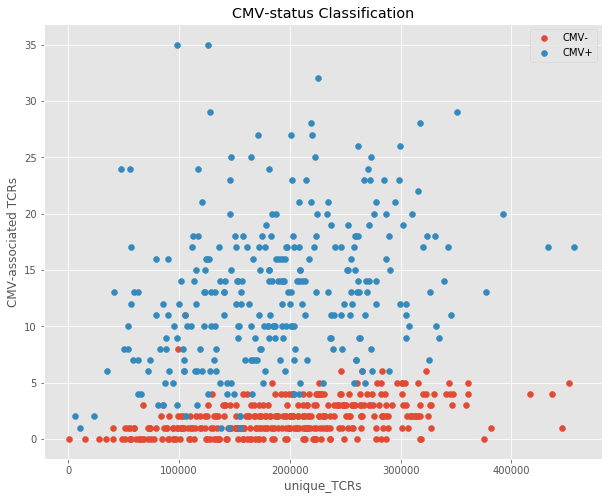

In [4]:
plt.figure(figsize=(10,8))

plt.scatter(CMV_neg['unique_TCRs'],CMV_neg['CMV_associated_TCRs'],label='CMV-')
plt.scatter(CMV_pos['unique_TCRs'],CMV_pos['CMV_associated_TCRs'],label='CMV+')
plt.xlabel('unique_TCRs')
plt.ylabel('CMV-associated TCRs')
plt.legend()
plt.title('CMV-status Classification')

## Compare the incidence of CMV-associated TCRs

In [8]:
stat_paper = pickle.load(open(data_path+'MAP_estimator/'+'inc_paper.pkl','rb'))
stat_got = pickle.load(open(data_path+'MAP_estimator/'+'inc_164.pkl','rb'))
comparison = stat_paper.merge(stat_got,on='TCR')[['TCR','Incidence in CMV+ subjects',
                                                   'Incidence in CMV- subjects',
                                                   'CMV+','CMV-']]

diff_pos = comparison['CMV+']-comparison['Incidence in CMV+ subjects']
diff_neg = comparison['CMV-']-comparison['Incidence in CMV- subjects']

comparison['difference_CMV+'] = diff_pos
comparison['difference_CMV-'] = diff_neg

comparison.head()

,TCR,Incidence in CMV+ subjects,Incidence in CMV- subjects,CMV+,CMV-,difference_CMV+,difference_CMV-
0,"(TCRBV09, TCRBV09-01, null, CASSGQGAYEQYF, TCR...",61,11,61,12,0,1
1,"(TCRBV19, TCRBV19-01, null, CASSIGPLEHNEQFF, T...",30,0,30,0,0,0
2,"(TCRBV05, TCRBV05-01, 01, CASSPDRVGQETQYF, TCR...",33,1,33,1,0,0
3,"(TCRBV07, TCRBV07-02, 01, CASSLEAEYEQYF, TCRBJ...",30,1,30,1,0,0
4,"(TCRBV28, TCRBV28-01, 01, CASSIEGNQPQHF, TCRBJ...",26,0,26,0,0,0


### Get TCRs that have different incidences

In [9]:
comparison['difference_CMV+'].value_counts()

0    164
Name: difference_CMV+, dtype: int64

In [11]:
comparison['difference_CMV-'].value_counts()

 0    160
 1      3
-1      1
Name: difference_CMV-, dtype: int64

**The incidence in CMV+ subjects are the same, but there are 4 TCRs have different values on the incidence in the CMV- subjects**

In [12]:
comparison.groupby(['difference_CMV+']).groups

{0: Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             154, 155, 156, 157, 158, 159, 160, 161, 162, 163],
            dtype='int64', length=164)}

In [13]:
comparison.groupby(['difference_CMV-']).groups

{-1: Int64Index([41], dtype='int64'),
 0: Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
             ...
             154, 155, 156, 157, 158, 159, 160, 161, 162, 163],
            dtype='int64', length=160),
 1: Int64Index([0, 56, 76], dtype='int64')}

**Get the index of these 4 TCRs**

In [15]:
diff_TCRs_index = {}
# diff_TCRs_index['diff_CMV_pos']=comparison.groupby(['difference_CMV+']).groups[1].tolist() 
diff_TCRs_index['diff_CMV_neg']=comparison.groupby(['difference_CMV-']).groups[-1].tolist()+\
                                comparison.groupby(['difference_CMV-']).groups[1].tolist()

In [17]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.describe_option('display')
comparison.iloc[diff_TCRs_index['diff_CMV_neg']]

,TCR,Incidence in CMV+ subjects,Incidence in CMV- subjects,CMV+,CMV-,difference_CMV+,difference_CMV-
41,"(TCRBV12, unresolved, null, CASSLGGAGDTQYF, TC...",46,16,46,15,0,-1
0,"(TCRBV09, TCRBV09-01, null, CASSGQGAYEQYF, TCR...",61,11,61,12,0,1
56,"(TCRBV09, TCRBV09-01, null, CASSVTGGTDTQYF, TC...",74,41,74,42,0,1
76,"(TCRBV05, TCRBV05-08, 01, CASSLRGSSYNEQFF, TCR...",25,5,25,6,0,1
